In [1]:
import scipy as sp
data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")
print(data.shape)
x = data[:,0]
y = data[:,1]

(743, 2)


In [2]:
# избавляемся от Nan значений
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

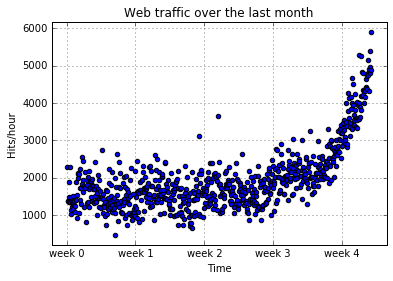

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [8]:
def error(f, x, y): #f - function
   return sp.sum((f(x)-y)**2)

In [29]:
# Linear aproximation
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 100, full=True)
print("Model parameters: %s" % fp1)
f1 = sp.poly1d(fp1)
print("error", error(f1, x, y))

Model parameters: [  0.00000000e+000  -0.00000000e+000  -0.00000000e+000   0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000
   0.00000000e+000  -0.00000000e+000   0.00000000e+000  -0.00000000e+000
   0.00000000e+000  -0.00000000e+000  -0.00000000e+000   0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000   0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000   0.00000000e+000
  -0.00000000e+000   0.00000000e+000   0.00000000e+000  -0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000  -6.72781136e-140
   1.19710322e-136  -4.65667888e-135  -4.66523655e-131  -2.54268646e-128
   2.25987084e-126   1.39021354e-

743.0


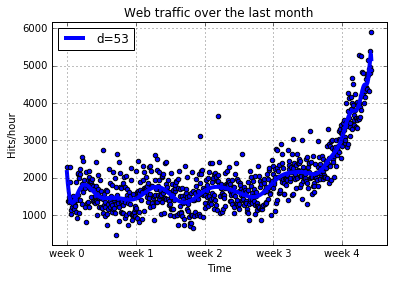

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
['week %i'%w for w in range(10)])

print (x[-1])
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.autoscale(tight=True)
plt.grid()
plt.show()

